# EDA of Nutritional Sales for Kaggle Competition

Author: Bradley Frueh

Date: November 2022 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Check Encoding of CSV file
file_path = 'c:\\Users\\bradf\\Projects\\Kaggle\\Nutrition_Supplement_Sales\\data\\Peptamant P Sales per Country.csv'

with open(file_path) as f:
    print(f)

<_io.TextIOWrapper name='c:\\Users\\bradf\\Projects\\Kaggle\\Nutrition_Supplement_Sales\\data\\Peptamant P Sales per Country.csv' mode='r' encoding='cp1252'>


the encoding is 'cp1252'

In [3]:

df = pd.read_csv(file_path, encoding='cp1252', header=1, sep=';', index_col=False)

# lower column names
df.columns = df.columns.str.lower()

df.head(3)

,observation\n,country\n,population\n(m),peptamant plus sales\n(mû),sales per capita\n(û),gnp per capita\n(û),unemployment rate\n(% of gnp),healthcare spending\n(% of gnp)
0,1,Austria,"8,4","941,2","112,05",49600,"4,2","5,8"
1,2,Belgium,"10,5","1681,9","160,18",47090,"8,1","5,9"
2,3,Bulgaria,"7,6",154,"20,26",6550,"13,5","3,5"


## Clean Headers
### Remove newline characters \n

In [4]:
df.columns = [x.replace("\n", " ") for x in df.columns.to_list()]

# create a copy for later
df1 = df.copy()

df.head(3)

,observation,country,population (m),peptamant plus sales (mû),sales per capita (û),gnp per capita (û),unemployment rate (% of gnp),healthcare spending (% of gnp)
0,1,Austria,"8,4","941,2","112,05",49600,"4,2","5,8"
1,2,Belgium,"10,5","1681,9","160,18",47090,"8,1","5,9"
2,3,Bulgaria,"7,6",154,"20,26",6550,"13,5","3,5"


In [5]:
df = df.stack().str.replace(',','.').unstack()

df.head(3)

,observation,country,population (m),peptamant plus sales (mû),sales per capita (û),gnp per capita (û),unemployment rate (% of gnp),healthcare spending (% of gnp)
0,NaN,Austria,8.4,941.2,112.05,NaN,4.2,5.8
1,NaN,Belgium,10.5,1681.9,160.18,NaN,8.1,5.9
2,NaN,Bulgaria,7.6,154,20.26,NaN,13.5,3.5


In [6]:
df.columns = df.columns.str.strip()
df1.columns = df.columns.str.strip()

print(df.columns,
    df1.columns,
    sep='\n\n'
)

Index(['observation', 'country', 'population (m)', 'peptamant plus sales (mû)',
       'sales per capita (û)', 'gnp per capita (û)',
       'unemployment rate (% of gnp)', 'healthcare spending (% of gnp)'],
      dtype='object')

Index(['observation', 'country', 'population (m)', 'peptamant plus sales (mû)',
       'sales per capita (û)', 'gnp per capita (û)',
       'unemployment rate (% of gnp)', 'healthcare spending (% of gnp)'],
      dtype='object')


In [7]:
df.loc[:,'observation']

df.loc[:, 'observation'] = df1.loc[:, 'observation']
df.loc[:, 'gnp per capita (û)'] = df1.loc[:, 'gnp per capita (û)']
df.head(3)

C:\Users\bradf\AppData\Local\Temp\ipykernel_1796\2099602839.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'observation'] = df1.loc[:, 'observation']
C:\Users\bradf\AppData\Local\Temp\ipykernel_1796\2099602839.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'gnp per capita (û)'] = df1.loc[:, 'gnp per capita (û)']


,observation,country,population (m),peptamant plus sales (mû),sales per capita (û),gnp per capita (û),unemployment rate (% of gnp),healthcare spending (% of gnp)
0,1,Austria,8.4,941.2,112.05,49600,4.2,5.8
1,2,Belgium,10.5,1681.9,160.18,47090,8.1,5.9
2,3,Bulgaria,7.6,154,20.26,6550,13.5,3.5


## Convert numeric strings intro numeric types

In [8]:
# list the numeric columns we want to convert

cols = ['population (m)','peptamant plus sales (mû)', 'sales per capita (û)', 'gnp per capita (û)','unemployment rate (% of gnp)','healthcare spending (% of gnp)']

# make conversions
df[cols] = df[cols].astype(float)
df['country'] = df['country'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   observation                     20 non-null     int64   
 1   country                         20 non-null     category
 2   population (m)                  20 non-null     float64 
 3   peptamant plus sales (mû)       20 non-null     float64 
 4   sales per capita (û)            20 non-null     float64 
 5   gnp per capita (û)              20 non-null     float64 
 6   unemployment rate (% of gnp)    20 non-null     float64 
 7   healthcare spending (% of gnp)  20 non-null     float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 2.0 KB



If we inspect the data columns we can infer the meaning of the data types.

| Col | Type | Descr |
| --- | ---- | ----- |
|  observation  |    int  |   Observation numbers.    |
|  country   |   category   |   Country name in proper case.    |
|  population (m)   |   float   |    Size of country population in millions   |
|  peptamant plus sales (mû)   |   float   |   Supplement sales for Peptamant Plus.     |
|  sales per capita (û)   |   float   |   Sales per capita in each country.    |
|  gnp per capita (û)   |   float   |   Gross National Product per capita?    |
|  unemployment rate (% of gnp)   |   float   |    ?   |
|  healthcare spending (% of gnp)   |   float   |   ?    |

Questions I'm left with aftre cleaning...

what does "mû" mean?

What does "û" mean?

What does it mean to have a rates and spending displayed as a percentage of GDP? 

I'm no domain expert so not super sure what those last two variables mean. I'll explore them none the less.

## Data Cleaning Complete. Moving on to EDA
### Descripitive Statistics

##### Sample size

In [9]:
df.shape

(20, 8)

##### Variable Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   observation                     20 non-null     int64   
 1   country                         20 non-null     category
 2   population (m)                  20 non-null     float64 
 3   peptamant plus sales (mû)       20 non-null     float64 
 4   sales per capita (û)            20 non-null     float64 
 5   gnp per capita (û)              20 non-null     float64 
 6   unemployment rate (% of gnp)    20 non-null     float64 
 7   healthcare spending (% of gnp)  20 non-null     float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 2.0 KB


##### Number of Missing Values

In [11]:
df.isnull().sum()

observation                       0
country                           0
population (m)                    0
peptamant plus sales (mû)         0
sales per capita (û)              0
gnp per capita (û)                0
unemployment rate (% of gnp)      0
healthcare spending (% of gnp)    0
dtype: int64

##### Numeric Variables

In [20]:
num_list = df.select_dtypes('number').columns.to_list()

num_list.remove('observation')


df[num_list].describe().T

,count,mean,std,min,25%,50%,75%,max
population (m),20.00,27.79,26.33,4.40,9.00,10.95,48.32,82.50
peptamant plus sales (mû),20.00,"2,518.93","2,561.85",154.00,791.90,"1,406.15","3,123.80","9,887.20"
sales per capita (û),20.00,102.46,54.06,20.26,67.44,98.31,136.25,229.72
gnp per capita (û),20.00,"36,256.50","18,839.63","6,550.00","19,355.00","41,015.00","50,187.50","64,430.00"
unemployment rate (% of gnp),20.00,8.01,3.18,3.60,6.20,7.15,9.45,14.40
healthcare spending (% of gnp),20.00,5.12,1.28,3.30,4.38,5.00,5.72,8.40


Adjust the formatting to to show 2 decimal points 

In [13]:
pd.options.display.float_format = '{:,.2f}'.format

df[num_list]

,observation,population (m),peptamant plus sales (mû),sales per capita (û),gnp per capita (û),unemployment rate (% of gnp),healthcare spending (% of gnp)
0,1,8.40,941.20,112.05,"49,600.00",4.20,5.80
1,2,10.50,"1,681.90",160.18,"47,090.00",8.10,5.90
2,3,7.60,154.00,20.26,"6,550.00",13.50,3.50
3,4,10.20,"1,028.70",100.85,"20,670.00",6.60,4.40
4,5,5.50,935.40,170.07,"62,120.00",5.20,8.40
5,7,61.90,"5,928.90",95.78,"44,510.00",10.00,5.70
6,8,82.50,"6,824.30",82.72,"44,450.00",9.10,4.60
7,9,11.20,813.00,72.59,"31,670.00",9.90,3.90
8,10,10.00,449.00,44.90,"15,410.00",7.30,5.10
9,11,4.40,576.90,131.11,"60,460.00",6.30,4.30


## Plotting 

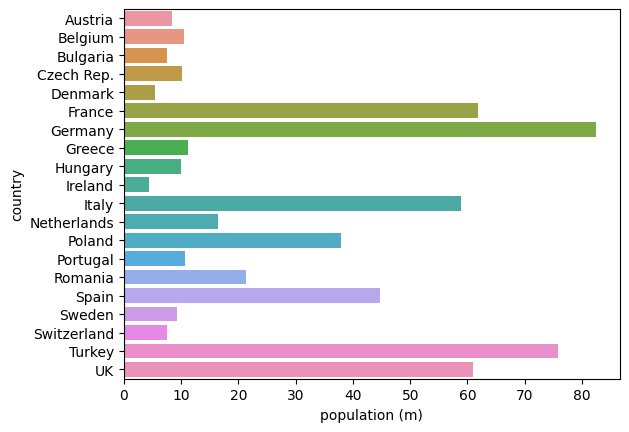

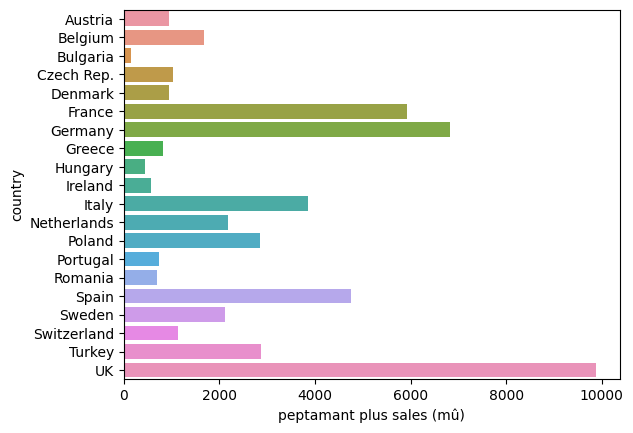

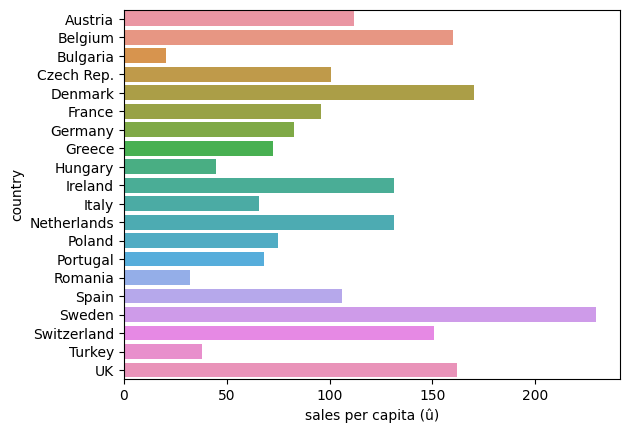

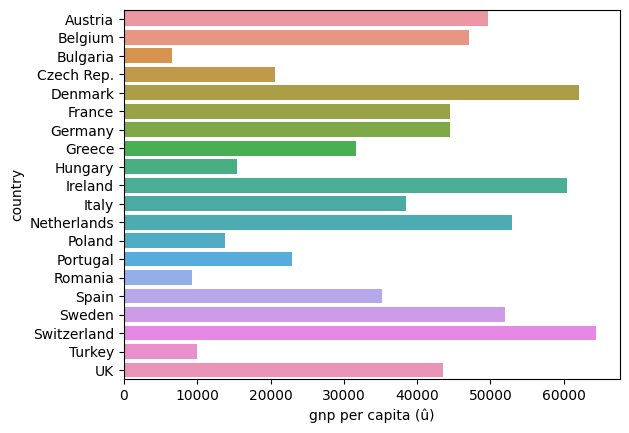

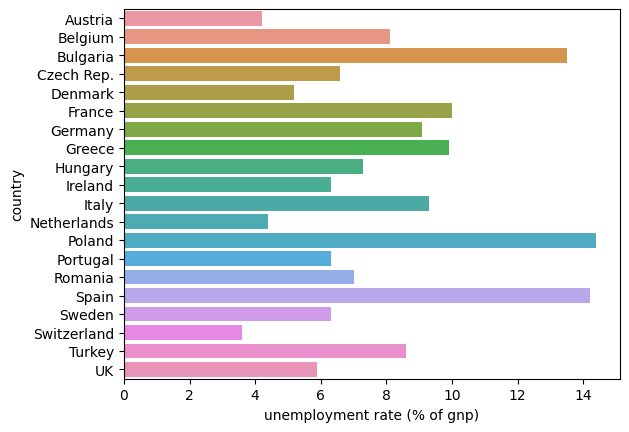

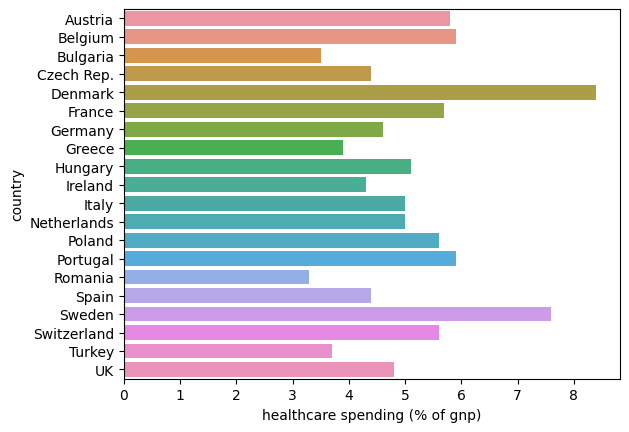

In [27]:
for col in df[num_list]:
    plt.figure()
    sns.barplot(data=df, x=col, y='country')


## Correlations
### Is there a correlation between supplement sales of Peptamant and unemployment? 
### Is there a correlation between healthcare spending?



Results for unemployment rate (% of gnp)
slope: 0.00022306179568835126

intercept: 7.448122950986743

rvalue: 0.17992538129025673

pvalue: 0.4478124780840509

stderr: 0.00028744215936664445


Results for healthcare spending (% of gnp)
slope: 0.00022306179568835126

intercept: 7.448122950986743

rvalue: 0.17992538129025673

pvalue: 0.4478124780840509

stderr: 0.00028744215936664445


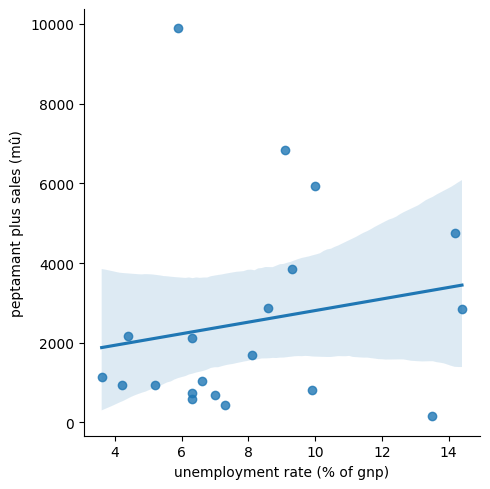

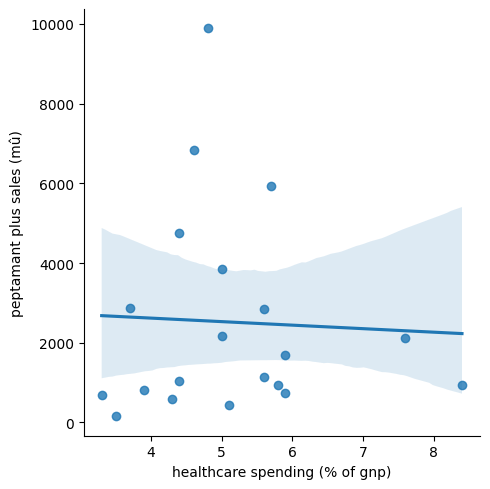

In [66]:
reg_list = ['unemployment rate (% of gnp)','healthcare spending (% of gnp)']

for col in df[reg_list]:
    sns.lmplot(x=col, y='peptamant plus sales (mû)', data=df)

for col in df[reg_list]:
    print('\n')
    print(f'Results for {col}')
    result = stats.linregress(df['peptamant plus sales (mû)'],df['unemployment rate (% of gnp)'])
    print(
    f'slope: {result.slope}',
    f'intercept: {result.intercept}',
    f'rvalue: {result.rvalue}',
    f'pvalue: {result.pvalue}',
    f'stderr: {result.stderr}',
    sep='\n\n'
    )